In [33]:
import numpy as np
import matplotlib.pyplot as plt
import _pickle as pickle

# Question 2 (Least Squares Polynomial Regression)

In [34]:
# A helper function to return the input-ouput data pairs for the small training set
def load_small_training_data(i):
    with open("A1_Dataset/datasets_" + str(i) + "/small_train.pkl", "rb") as f:
        data=pickle.load(f)
    
    x = data["X"]
    y = data["Y"]

    return x, y

# A helper function to return the input-ouput data pairs for the large training set
def load_large_training_data(i):
    with open("A1_Dataset/datasets_" + str(i) + "/large_train.pkl", "rb") as f:
        data=pickle.load(f)
    
    x = data["X"]
    y = data["Y"]

    return x, y

# A helper function to return the input-ouput data pairs for the test set
def load_test_data(i):
    with open("A1_Dataset/datasets_" + str(i) + "/test.pkl", "rb") as f:
        data=pickle.load(f)
    
    x = data["X"]
    y = data["Y"]

    return x, y

## The design matrix

For this polynomial model our design matrix will be the Vandermonde matrix  

$$X= \begin{bmatrix}
           1 & x_{1} & x_{1}^{2} & ... & x_{1}^{K} \\
           1 & x_{2} & x_{2}^{2} & ... & x_{2}^{K} \\
           . & . & . & . & . \\
           1 & x_{m} & x_{m}^{2} & ... & x_{m}^{K} \\
            \end{bmatrix}$$  
where,  
$K$, is the largest monomial degree  
$m$, is the number of input-output sample pairs in the dataset  


In [35]:
# helper function to return the design (Vandermonde) matrix with the largest monomial degree being K
def designMatrix(x, K):
    return np.vander(x, K+1, True)

## Vector of Coefficients, w (OLS Estimates)
Using the method of ordinary least squares, our estimated vector of coefficients will be:  

$w= \left(X^{T}X\right)^{-1}X^{T}y$  

where,  
$X$, is our design (Vandermonde) matrix  
$y$,  is the column vector of observed outputs  

### Derivation of OLS Estimate, $\left(X^{T}X\right)^{-1}X^{T}y$
Our least square objective function is,  
$E(w) = \sum_{i=1}^{m}\left(y_{i} - \sum_{k=0}^{K}w_{k}x_{i}^{k}\right)^{2}$  

This can we re-written as:  
$E(w) = \|y-Xw\|^{2}$  
$E(w) = \left(y-Xw\right)^{T}\left(y-Xw\right)$  

To minimize $E(w)$, set the derivative equal to 0 and solve for $w$  
$\nabla_{w} E(w) = \nabla_{w}\left[\left(y-Xw\right)^{T}\left(y-Xw\right)\right]$  
$\nabla_{w} E(w) = \nabla_{w}\left[\left(y^{T}-w^{T}X^{T}\right)\left(y-Xw\right)\right]$  
$\nabla_{w} E(w) = \nabla_{w}\left(w^{T}X^{T}Xw + y^{T}y - y^{T}Xw - w^{T}X^{T}y\right)$  
$\nabla_{w} E(w) = \nabla_{w}tr\left(w^{T}X^{T}Xw + y^{T}y - y^{T}Xw - w^{T}X^{T}y\right)$ , since $E(w)$ is a scalar  
$\nabla_{w} E(w) = \nabla_{w}\left[tr(w^{T}X^{T}Xw) + tr(y^{T}y) - tr(y^{T}Xw) - tr(w^{T}X^{T}y)\right]$ , by linearity of trace  
$\nabla_{w} E(w) = \nabla_{w}tr(w^{T}X^{T}Xw) + \nabla_{w}tr(y^{T}y) - \nabla_{w}tr(y^{T}Xw) - \nabla_{w}tr(w^{T}X^{T}y)$ , by linearity of differentiation  
$\nabla_{w} E(w) = 2X^{T}Xw + 0 - \nabla_{w}tr(w^{T}X^{T}y) - \nabla_{w}tr(w^{T}X^{T}y)$ , by matrix identities and $tr(A) = tr(A^{T})$  
$\nabla_{w} E(w) = 2X^{T}Xw - 2\nabla_{w}tr(w^{T}X^{T}y)$  
$\nabla_{w} E(w) = 2X^{T}Xw - 2X^{T}y$  

$\nabla_{w} E(w) = 0$  
$2X^{T}Xw - 2X^{T}y = 0$  
$X^{T}Xw = X^{T}y$  
$w = (X^{T}X)^{-1}X^{T}y$  

In [36]:
# helper function to return the vector of estimated coefficients
def estimatedCoefficients(X, y):
    psuedoInv = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)
    return np.dot(psuedoInv, y)

## Training and Test Error
The training error is calculated by:  
$E_{train} = \dfrac{1}{P_{train}}\sum_{i=1}^{P_{train}}(y_{i}-p_{i})^{2}$  

where,  
$P_{train}$ = the number of sample points in your training set  
$y_{i}$ = the ith observed value in the training set  
$p_{i}$ = the ith predicted value  

Note that this is equivalent to:  

$E_{train} = \dfrac{1}{P_{train}}\|y_{train}-Xw\|^{2}$  

where,  
$y_{train}$ = the column vector containing the observed values of the training set  

Similar process done for the Test Error...  

Below is a helper function to build a model given the polynomial degree, training set size, and dataset number. It returns the number of sample points in the training set, the training error, and the test error

In [37]:
# Train model
# K: the highest monomial degree
# size: the size of the dataset (small or large)
# setNum: the dataset number (1, 2, or 3)
# Returns (# of data points in training set, the training error, the test error)
def trainModel(K, size, setNum):
    # Train model on small set
    if size == "small":
        x, y = load_small_training_data(setNum)
    elif size == "large":
        x, y = load_large_training_data(setNum)
    else:
        print("INVALID SIZE INPUT")
        return
    
    X = designMatrix(x.flatten(), K)
    w = estimatedCoefficients(X, y)
    
    # Compute the training error
    trainSetSize = x.shape[0]
    yTrainHat = np.dot(X, w)
    trainingError = ((np.linalg.norm(y - yTrainHat)) ** 2) / trainSetSize

    # plt.scatter(x, y)
    # plt.scatter(x, yTrainHat)
    # plt.legend(["train", "predicted"])
    
    # Compute the test error
    x_t, y_t = load_test_data(setNum)
    testSetSize = x_t.shape[0]
    X_t = designMatrix(x_t.flatten(), K)

    yTestHat = np.dot(X_t, w)
    testError = ((np.linalg.norm(y_t - yTestHat)) ** 2) / testSetSize

    # plt.scatter(x_t, y_t)
    # plt.scatter(x_t, yTestHat)
    # plt.legend(["test", "predicted"])
    
    return trainSetSize, trainingError, testError

## Effects of Training Set Size
In this case, the training set size refers to the number of sample points.  
Below is a method to help visualize the the effects of training set size on training and test Error

In [38]:
# Plot the difference between error for small training set and large training set
# K: the highest monomial degree (1-10)
# setNum: the data set number (1, 2, or 3)
def trainingSetSizeEffect(K, setNum): 
    setSize = []
    trainError = []
    testError = []

    size, train, test = trainModel(K, "small", setNum)
    setSize.append(size)
    trainError.append(train)
    testError.append(test)

    size, train, test = trainModel(K, "large", setNum)
    setSize.append(size)
    trainError.append(train)
    testError.append(test)

    print("Set Sizes", setSize)
    print("Training Errors", trainError)
    print("Test Errors", testError)

    plt.plot(setSize, trainError)
    plt.plot(setSize, testError)
    plt.title('Effects of Training Dataset Size')
    plt.legend(["Train Error", "Test Error"])
    plt.xlabel('Training Dataset Size')
    plt.ylabel('Error')

## Question 2 Answers
### Q2.1, Q2.2, Q2.3
1). If the size of the training set increases, then we would expect the model's training error to increase aswell. This is because as there are more sample points, the model cannot fit the training data aswell as opposed to when the training set size is small.  
If the size of the training set increases, then we would expect the test error to decrease. Since if there are more sample points, the training data should be more representative of the actual function so the model will be able to obtain a more accurate fit.  
The following 3 plots are tests ran to visualize the effects of increasing training set size for each of the 3 datasets.  

2). If the size of the test set increases, then the model's training error would be unaffected since the test set has nothing to do with the training error.  
If the size of the test set increases, then we would expect the test error to not really change. Since the regression model is still the same, the average error should still be the same.

3). In general, the more training data obtained the better for building a good model. This is because if you can build a model that accurately represents the training set, then the closer the training set is to desired function (essentially, the more training data there is) the closer the model will be to the desired function.  
We can see in the all of the following 3 plots, as the training set size increases, the test error goes down which shows that the polynomial model is able to predict future sample data more accurately when given more data to train on.  


**Below are 3 plots to support the above arguments**

Set Sizes [16, 32]
Training Errors [3.41796511096106, 5.663762797367279]
Test Errors [2.6978212544399636, 2.0994284862154244]


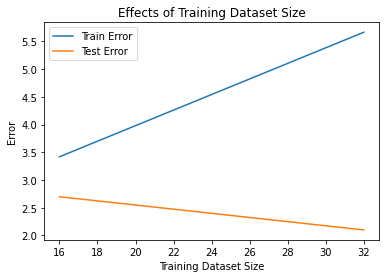

In [39]:
# DATASET 1
# Runing a few tests found K=2 to be a good value
# Effects of training set size on dataset 1 with K=2
trainingSetSizeEffect(K=2, setNum=1)

Set Sizes [16, 32]
Training Errors [2.502805545981495, 1.1677575571266847]
Test Errors [6.199277978999507, 2.909227933979454]


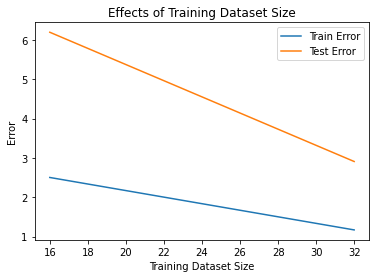

In [40]:
# DATASET 2
# Runing a few tests found K=6 to be a good value
# Effects of training set size on dataset 2 with K=6
trainingSetSizeEffect(K=6, setNum=2)

Set Sizes [16, 32]
Training Errors [1.0210156652560562, 1.286031848340441]
Test Errors [2.813325150276741, 1.970621214051394]


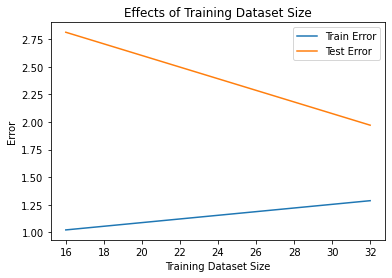

In [41]:
# DATASET 3
# Runing a few tests found K=4 to be a good value
# Effects of training set size on dataset 3 with K=4
trainingSetSizeEffect(K=4, setNum=3)

## Effects of model complexity
In this case, the model complexity refers to the degree of the polynomial model (the higher the degree, the higher the complexity of the model).  
Below are methods to help visualize the the effects of model complexity on training and test error

In [42]:
# Plot the effect of increasing model complexity (degree of polynomial) on training and test error
# setNum: the data set number (1, 2, or 3)
# size: the size of the training set (small or large)
def modelComplexityEffect(setNum, size):
    modelComplexity = [i for i in range(1, 11)]
    trainError = []
    testError = []

    for i in range(1, 11):
        _, train, test = trainModel(i, size, setNum)
        trainError.append(train)
        testError.append(test)

    
    print("Model Complexity", modelComplexity)
    print("Training Errors", trainError)
    print("Test Errors", testError)

    plt.plot(modelComplexity, trainError)
    plt.plot(modelComplexity, testError)
    plt.title(str(size) + '-Training-Set Effects of Model Complexity')
    plt.legend(["Train Error", "Test Error"])
    plt.xlabel('Model Complexity (Degree of Polynomial)')
    plt.ylabel('Error (Log Scale)')
    plt.yscale('log')

## Question 2 Answers
### Q2.4, Q2.5, Q2.6, Q2.7
4). If the model is too simple (degree of polynomial is too low) then both the training and test errors will be very high. This is because the model is unable to acurately fit the training data so of course, the model will not generalize to the new test data. Essentially, we get underfitting if the model is too simple.  
We can see in all of the plots below, when the model is too simple (the degree of the polynomial is too low) the training and test errors are very high compared to the respective lowest error value when the model has a good fit.  

5). If the model is too complex (degree of polynomial is too high) then the training error will be low but the test error will be high. This is because the higher complexity/degree of polynomial allows the model to fit the training data more accurately which leads to a low training error however, this also leads to the model learning the noise of the training data which does not apply to new data causing the models ability to generalize to the new test data to be worsened. Thus leading to a high test error. Essentially, we get overfitting if the model is too complex.  
We can see in all the plots below, when the model is too complex (the degree of the polynomial is too high) the training error is minimized but the test error is high compared to the lowest respective test error when the model has a good fit.  

6).  
For dataset 1, the model with a degree of **2** gave the best performance.  
For dataset 2, the model with a degree of **6** gave the best performance.  
For dataset 3, the model with a degree of **4** gave the best performance.  

To determine the degree that gave me the best performance for each respective dataset, I simply found the degree that provided the lowest test error since that means it is able to predict new data the best. Additionally, for each of the datasets, the large training set provided the best performing model which is expected by Q2.1  

7). 
I think the degree of the model with the best performance (as seen in Q2.6) is the degree of the polynomial used to generate the data. Since it would make sense for a model with the same degree as the original polynomial to provide the best fit/performance.  
More specifically:  
For dataset 1, the degree of the polynomial used to generate the data is most likely **2**.  
For dataset 2, the degree of the polynomial used to generate the data is most likely **6**.  
For dataset 3, the degree of the polynomial used to generate the data is most likely **4**.  

Model Complexity [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Training Errors [30.597066090896295, 3.41796511096106, 3.4178976981138334, 0.7532015436269939, 0.6325159304723577, 0.5597885819353016, 0.5594646270358461, 0.3269160103196662, 0.21546316039437793, 0.21391445274922902]
Test Errors [36.26394464644038, 2.6978212544399636, 2.694148681732264, 5.730821760531049, 4.480249278600081, 5.225318043132746, 5.212096696880256, 7.615242134837632, 8.433212263995193, 10.0163584026245]


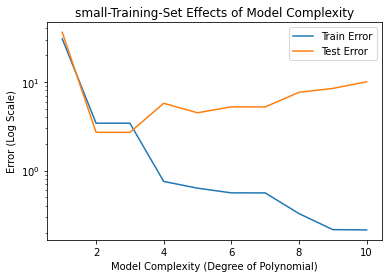

In [43]:
# DATASET 1 Small
# Effects of model complexity (degree of polynomial) on dataset 1 small
modelComplexityEffect(setNum=1, size="small")

Model Complexity [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Training Errors [28.771679384676926, 5.663762797367279, 3.870949785530033, 2.105443064702502, 1.9961638413139047, 1.950295293574147, 1.6628414092572277, 1.4652446175901956, 1.4605702270123706, 1.3917741731675115]
Test Errors [30.407982023063823, 2.0994284862154244, 2.6471166410498332, 6.244530593300156, 4.505935615223714, 4.810027297838775, 5.674785256824468, 6.1521864296934945, 6.927630675914554, 5.169417329948267]


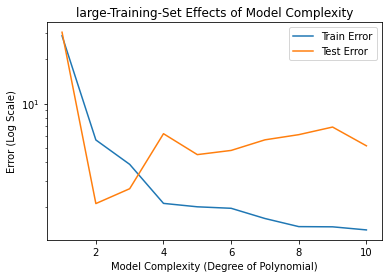

In [44]:
# DATASET 1 Large
# Effects of model complexity (degree of polynomial) on dataset 1 large
modelComplexityEffect(setNum=1, size="large")

Model Complexity [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Training Errors [230.46410205759977, 41.368636791571504, 10.721998747052583, 2.631423523510491, 2.5868201863426274, 2.502805545981495, 2.428276561058517, 1.6970697176440037, 1.591351136359682, 0.47717814141091425]
Test Errors [298.28185410131636, 82.64457159040118, 22.988521258344957, 5.629122763402114, 6.167429290640855, 6.199277978999507, 6.724247936344372, 12.35681142856769, 9.757250056537114, 286.9475465680904]


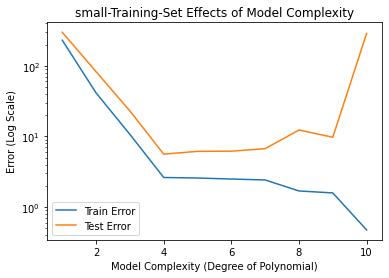

In [45]:
# DATASET 2 Small
# Effects of model complexity (degree of polynomial) on dataset 2 small
modelComplexityEffect(setNum=2, size="small")

Model Complexity [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Training Errors [90.24069066543004, 17.2480052580702, 5.918811318498115, 2.201384736688642, 1.2365601121921306, 1.1677575571266847, 1.1665095612136667, 1.148167487317758, 1.1248566662489308, 1.0704958032644956]
Test Errors [438.07376089332314, 138.8639345903167, 41.74839578826869, 5.068467314063015, 4.612988606888452, 2.909227933979454, 3.0466145303092103, 5.7288668348086, 25.7997315044145, 145.48275358734085]


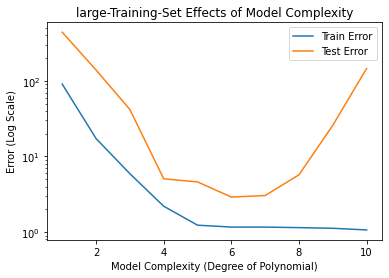

In [46]:
# DATASET 2 Large
# Effects of model complexity (degree of polynomial) on dataset 2 large
modelComplexityEffect(setNum=2, size="large")

Model Complexity [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Training Errors [27.96023390657074, 2.0936462422265354, 2.0934226737137216, 1.0210156652560562, 0.6336013036121334, 0.477234448364259, 0.4295020275825721, 0.21649675087244621, 0.21354624543883108, 0.13420655207348714]
Test Errors [445.72617519092313, 83.00450704922198, 81.88082580898948, 2.813325150276741, 170.05930493621523, 959.3558385799594, 18.105533429717664, 140536.7861269858, 341899.03654429707, 12375661.008678162]


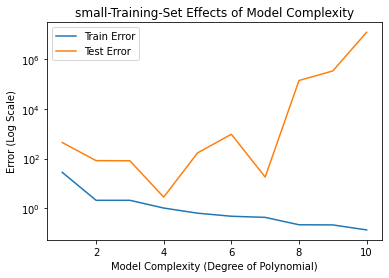

In [47]:
# DATASET 3 Small
# Effects of model complexity (degree of polynomial) on dataset 3 small
modelComplexityEffect(setNum=3, size="small")

Model Complexity [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Training Errors [126.49794156733003, 8.7625694947651, 4.918489128778923, 1.286031848340441, 1.011013139222032, 0.9916977618710463, 0.990471794127602, 0.8572659236295259, 0.8078484319299841, 0.7686226918180608]
Test Errors [220.9375116910967, 16.324396432540397, 7.392282588555111, 1.970621214051394, 2.0863427634502636, 2.1584953375271665, 2.0995086063716695, 2.871518546784064, 2.4459290892731715, 3.696437678916144]


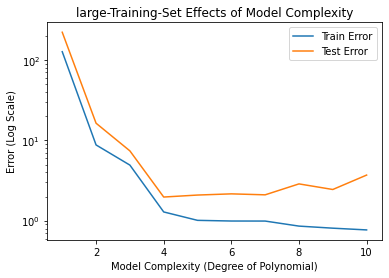

In [48]:
# DATASET 3 Large
# Effects of model complexity (degree of polynomial) on dataset 3 large
modelComplexityEffect(setNum=3, size="large")